## **Importing Libraries**

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_path(filepath):
  filenames = []
  imgs = []
  files_path = [f for f in glob.glob(filepath)]
  for filename in files_path:
    if 'segmentation' not in filename:
      filenames.append(filename)
      imgs.append(cv2.imread(os.path.join(filepath[:79],filename)))
  return filenames,imgs

def _parse_function(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.cast(image_decoded, tf.float32)
    return image, label


"\ncnh_filenames = []\ncnh_labels = []\ncnh_label = [0,1,2] #['Aberto','Frente','Verso']\ncnh_aberta,img = read_path('/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Aberta/*.jpg')\ncnh_frente = read_path('/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Frente/*.jpg')\ncnh_verso = read_path('/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Verso/*.jpg')\n\nfor a,f,v in zip(cnh_aberta,cnh_frente,cnh_verso):\n  cnh_filenames.append(a)\n  cnh_labels.append(cnh_label[0])\n  cnh_filenames.append(f)\n  cnh_labels.append(cnh_label[1])\n  cnh_filenames.append(v)\n  cnh_labels.append(cnh_label[2])\n\n\n\nfilenames = tf.constant(cnh_filenames)\nlabels = tf.constant(cnh_labels)\n\ndataset = tf.data.Dataset.from_tensor_slices((filenames,labels))\nprint(dataset)\n\ndataset = dataset.map(_parse_function)\n#dataset = dataset.batch(2)\n\nprint(type(dataset))\n\nfor d in dataset:\n  tf.print(d)\n\n\n#tf.image.decode_jpeg(filename

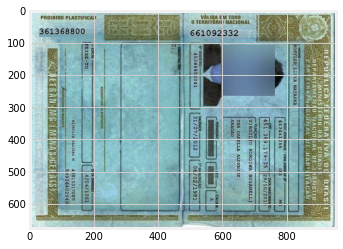

In [13]:
import glob
import cv2


cnh_aberta,imgs = read_path('/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Aberta/*.jpg')
plt.imshow(imgs[1])
'''
cnh_filenames = []
cnh_labels = []
cnh_label = [0,1,2] #['Aberto','Frente','Verso']
cnh_aberta,img = read_path('/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Aberta/*.jpg')
cnh_frente = read_path('/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Frente/*.jpg')
cnh_verso = read_path('/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Verso/*.jpg')

for a,f,v in zip(cnh_aberta,cnh_frente,cnh_verso):
  cnh_filenames.append(a)
  cnh_labels.append(cnh_label[0])
  cnh_filenames.append(f)
  cnh_labels.append(cnh_label[1])
  cnh_filenames.append(v)
  cnh_labels.append(cnh_label[2])



filenames = tf.constant(cnh_filenames)
labels = tf.constant(cnh_labels)

dataset = tf.data.Dataset.from_tensor_slices((filenames,labels))
print(dataset)

dataset = dataset.map(_parse_function)
#dataset = dataset.batch(2)

print(type(dataset))

for d in dataset:
  tf.print(d)


#tf.image.decode_jpeg(filenames[1])

#print(dataset)
#dataset = dataset.batch(2)

#print('-->',dataset)

#print(cnh_filenames[1])
#plt.imshow(cnh_filenames[0])
# step 4: create iterator and final input tensor
#iterator = dataset.make_one_shot_iterator()
#images, labels = iterator.get_next()



#print(cnh_filenames)



#print(glob.glob(aberta))


#for cnh_a,cnh_f,cnh_v in zip(cnh_aberta,cnh_frente,cnh_verso):
#  cnh_filenames =


#print(glob.glob('/content/drive/My Drive/Colab Notebooks/Desafio01/'))
#cnh,cnh_y = read_paths('/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Aberta/*.jpg',
#                 '/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Frente/*.jpg',
#                 '/content/drive/My Drive/Colab Notebooks/Desafio01/BID Sample Dataset/CNH_Verso/*.jpg')


#print(cnh_y[33])
#plt.imshow(cnh[33])
'''



## loading **database**

In [ ]:
#Loding data
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## **Get the shape of the arryas**

In [ ]:
print('X_train shape:', x_train.shape)
print('Y_train shape:', y_train.shape)
print('X_test shape:', x_test.shape)
print('Y_test shape:', y_test.shape)
print(y_train[1])

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)
[9]


## **Take a look at the first image**

In [ ]:
#Take a look at the first image 
index = 10
x_train[index]

The image label is: [9]


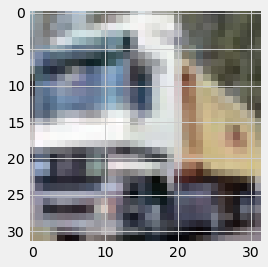

In [ ]:
#Show the image
img = plt.imshow(x_train[1])
print('The image label is:',y_train[1])

In [ ]:
#Get the image classification
classification = ['airplane','autombile','bird','cat','deer','dog','frog','house','ship','truck']

print('The image class is: ',classification[y_train[index][0]])

The image class is:  deer


In [ ]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Print the new labels of the image/picture above
print(y_test_one_hot[index])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## **Normalize the pixels to be values between 0 and 1**

In [ ]:
# (A pixel contains 8 bits (1 byte))
#8-bit integer giving a range of possible values from 0 to 255.
x_train = x_train / 255
x_test = x_test / 255


In [ ]:
x_train[index]

In [ ]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convolution layer
model.add(Conv2D(32,(5,5),activation='relu'))

#Add a another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flatteing layer
model.add(Flatten())

#add a layer with 1000 neurons
model.add(Dense(1000,activation='relu'))

#add a drop out layer
model.add(Dropout(0.5))

#add a layer with 500 neurons
model.add(Dense(500,activation='relu'))

#add a drop out layer
model.add(Dropout(0.5))

#add a layer with 250 neurons
model.add(Dense(250,activation='relu'))

#add a layer with 10 neurons
model.add(Dense(10,activation='softmax'))



In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train,y_train_one_hot, 
                 batch_size=256, 
                 epochs=10, 
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 80s 512ms/step - loss: 1.8066 - accuracy: 0.3268 - val_loss: 1.5465 - val_accuracy: 0.4275
Epoch 2/10
157/157 [==============================] - 76s 485ms/step - loss: 1.4420 - accuracy: 0.4697 - val_loss: 1.3879 - val_accuracy: 0.5094
Epoch 3/10
157/157 [==============================] - 77s 491ms/step - loss: 1.3111 - accuracy: 0.5266 - val_loss: 1.3880 - val_accuracy: 0.5159
Epoch 4/10
157/157 [==============================] - 78s 494ms/step - loss: 1.2082 - accuracy: 0.5653 - val_loss: 1.1315 - val_accuracy: 0.5963
Epoch 5/10
157/157 [==============================] - 77s 491ms/step - loss: 1.1192 - accuracy: 0.5980 - val_loss: 1.0716 - val_accuracy: 0.6200
Epoch 6/10
157/157 [==============================] - 78s 495ms/step - loss: 1.0515 - accuracy: 0.6280 - val_loss: 1.0458 - val_accuracy: 0.6348
Epoch 7/10
157/157 [==============================] - 77s 491ms/step - loss: 1.0027 - accuracy: 0.6459 - val_loss: 0.9890 - val_ac

In [ ]:
#Evaluate the model using the test data set
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 9s 28ms/step - loss: 1.0129 - accuracy: 0.6539


0.6539000272750854

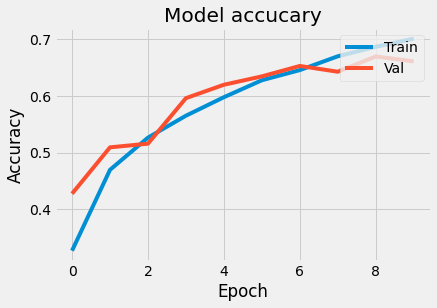

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy']) #validation accuracy
plt.title('Model accucary')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

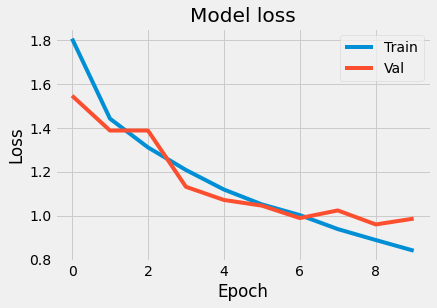

In [ ]:
#Vizualise the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) #validation loss
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

## Test the model with an example

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2.jpg to 2.jpg


In [ ]:
#show the image
new_img = plt.imread('2.jpg')
img = plt.imshow(new_img)

NameError: ignored

In [ ]:
#resize image
from skimage.transform import resize
resized_image = resize(new_img,(32,32,3))
img = plt.imshow(resized_image)

NameError: ignored

In [ ]:
#Get the models predictions 
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[1.1515141e-03, 1.1108655e-04, 3.8972054e-02, 8.6843133e-01,
        1.4044692e-02, 6.3907459e-02, 1.0537795e-02, 1.5735782e-03,
        1.1665832e-03, 1.0386339e-04]], dtype=float32)

In [ ]:
from types import prepare_class
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#show the sorted labels order
print(list_index)

[3, 5, 2, 4, 6, 7, 8, 0, 1, 9]


In [ ]:
for i in range(5):
  print(classification[list_index[i]],':',round(predictions[0][list_index[i]] * 100,2),'%')

cat : 86.84 %
dog : 6.39 %
bird : 3.9 %
deer : 1.4 %
frog : 1.05 %
